In [4]:
import sys

In [5]:
import os

In [6]:
#Pandas Library is used for analyzing, cleaning, exploring and manipulating data
import pandas as pd

In [7]:
#Numpy library is used for working with arrays
import numpy as np

In [8]:
#For visualizations , matplotlib library is used
import matplotlib.pyplot as plt

In [9]:
#Sequential and Functional are two ways to build keras models, Sequential Model is simplist type of model, a linear stock of layers
# In sequential, you can only stack one layer after another
# In functional model, you can connect a layer to literally any other layer 
from tensorflow.keras.models import Sequential

In [67]:
# A 2D Convolutional layer applies sliding convolution filters to 2D input. The layer convolves the input by moving
#the filters along the input horizontally and vertically, computing the dot product of the weughts and input
#The final layers in a CNN are fully (densely) connected layers. In Keras, these layers are created using the Dense()class.
#In Keras, a fully connected layer is referred to as a Dense layer.

# There are two types of pooling operations: Max pooling and Average pooling. Here, we use Max pooling.

#Each pooling layer in a CNN is created using the MaxPooling2D()class that simply performs the Max pooling operation in a two-#dimensional space.

#Batch Norm is a normalization technique done between the layers of a Neural Network instead of in the raw data. It is done along mini-#batches instead of the full data set. It serves to speed up training and use higher learning rates, making learning easier.

#dropout reduces the complexity of a network and prevents overfitting, it is considered a regularization method

#Flatten layer is used to make the multidimensional input one-dimensional, commonly used in the transition from the convolution layer to the full connected layer. 

from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, BatchNormalization,  Dropout, Flatten

In [11]:
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.
from keras.losses import categorical_crossentropy

In [12]:
from keras.optimizers import Adam

In [14]:
#Converts a class vector (integers) to binary class matrix
from keras.utils import np_utils

#**Download the dataset from the Drive**

In [15]:
!gdown "https://drive.google.com/uc?id=1JTchX2BOBF7PmbQQZSVNzvdtWxbw6q2v&confirm=t"


Downloading...
From: https://drive.google.com/uc?id=1JTchX2BOBF7PmbQQZSVNzvdtWxbw6q2v&confirm=t
To: /home/jovyan/storage/fer2013.csv
99%|████████████████████████████████████████▌| 298M/301M [00:01<00:00, 159MB/s]
100%|█████████████████████████████████████████| 301M/301M [00:01<00:00, 153MB/s]


#**Read the Dataset**

In [16]:
data = pd.read_csv("/home/jovyan/storage/fer2013.csv")

In [24]:
print(data.head())

emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


In [37]:
print(data.shape)

(35887, 3)


In [25]:
print(data['emotion'].unique())

[0 2 4 6 3 5 1]


In [0]:
print(data['Usage'].value_counts())


Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64


#**Preprocessing the Dataset**

In [45]:
X_train,train_y,X_test,test_y=[],[],[],[]

for index, row in data.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")

In [46]:
X_train = np.array(X_train, 'float32')

In [47]:
train_y = np.array(train_y, 'float32')

In [48]:
X_test = np.array(X_test, 'float32')

In [49]:
test_y = np.array(test_y,'float32')

In [0]:
print(train_y[:5])

[0. 0. 2. 4. 6.]


In [50]:
train_y = np_utils.to_categorical(train_y, num_classes=7)

In [0]:
print(train_y[:5])

[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


In [51]:
test_y = np_utils.to_categorical(test_y, num_classes=7)

#**Normalizing the Data Between 0 and 1**

In [52]:
X_train -= np.mean(X_train,axis=0)

In [0]:
print(X_train[:4])

[[-50.293465  -37.21244   -32.18994   ...  -6.67334    -4.4749374
  -32.320496 ]
 [ 30.706535   32.78756    32.81006   ...  80.32666    69.52506
   69.679504 ]
 [110.706535   94.78756    41.81006   ... -24.67334    -3.4749374
   37.679504 ]
 [-96.293465  -85.21244   -78.18994   ...  29.32666    29.525063
   27.679504 ]]


In [53]:
X_train/=np.std(X_train, axis=0)

In [0]:
print(X_train[:4])

[[-0.6098866  -0.4592209  -0.40325198 ... -0.08629682 -0.0573744
  -0.41127437]
 [ 0.37236458  0.40461555  0.41102034 ...  1.0387505   0.8913998
   0.8866632 ]
 [ 1.3424892   1.1697278   0.52376574 ... -0.31906524 -0.04455312
   0.47946712]
 [-1.1677083  -1.0515659  -0.97950625 ...  0.37924     0.3785489
   0.35221833]]


In [54]:
X_test -= np.mean(X_test, axis=0)

In [55]:
X_test/=np.std(X_test, axis=0)

In [0]:
print(X_test[:4])

[[ 1.6505896   1.7122597   1.774942   ... -0.9225547   0.18117245
   0.80417955]
 [ 0.45219082  0.84190166  1.0658671  ...  0.73589116  0.6640275
   0.5656745 ]
 [-0.6116937   0.02127829 -0.6688345  ... -0.33572    -0.35250947
  -0.32558146]
 [ 1.0513902   1.0781417   1.5470252  ... -0.90979743 -0.41604304
  -0.37579307]]


In [56]:
X_train.shape

(28709, 2304)

In [57]:
X_test.shape

(3589, 2304)

In [61]:
X_train = X_train.reshape(X_train.shape[0], 48,48,1)

In [62]:
print(X_train.shape)

(28709, 48, 48, 1)


In [63]:
X_test = X_test.reshape(X_test.shape[0], 48,48,1)

In [64]:
print(X_test.shape)

(3589, 48, 48, 1)


#**Designing a Convolutional Neural Network Model**

In [68]:
#1st convolution layer
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 conv2d_7 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 conv2d_9 (Conv2D)           (None, 18, 18, 64)        36928     
                                                      

#**Compile the Model**

In [70]:
model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

In [71]:
history = model.fit(X_train, train_y, batch_size=64, epochs = 200, verbose = 1, validation_data=(X_test, test_y), shuffle=True)

Epoch 1/200
7/449 [..............................] - ETA: 7s - loss: 1.8733 - accuracy: 0.2076
2023-04-11 10:17:00.211205: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
449/449 [==============================] - 9s 19ms/step - loss: 1.7211 - accuracy: 0.2939 - val_loss: 1.5497 - val_accuracy: 0.3806
Epoch 2/200
449/449 [==============================] - 8s 18ms/step - loss: 1.5132 - accuracy: 0.4046 - val_loss: 1.4097 - val_accuracy: 0.4436
Epoch 3/200
449/449 [==============================] - 8s 18ms/step - loss: 1.3997 - accuracy: 0.4551 - val_loss: 1.3186 - val_accuracy: 0.4968
Epoch 4/200
449/449 [==============================] - 8s 18ms/step - loss: 1.3305 - accuracy: 0.4847 - val_loss: 1.2609 - val_accuracy: 0.5219
Epoch 5/200
449/449 [==============================] - 8s 18ms/step - l

# **SAVING MODEL WEIGHTS**

In [74]:
# serialize model structure to JSON
model_json = model.to_json()
with open("modelcomplete.json", "w") as json_file:
    json_file.write(model_json)


In [75]:
from tensorflow.keras.models import save_model
save_model(model, "modelcomplete.h5")

# **ACCURACY AND LOSS PLOTS**

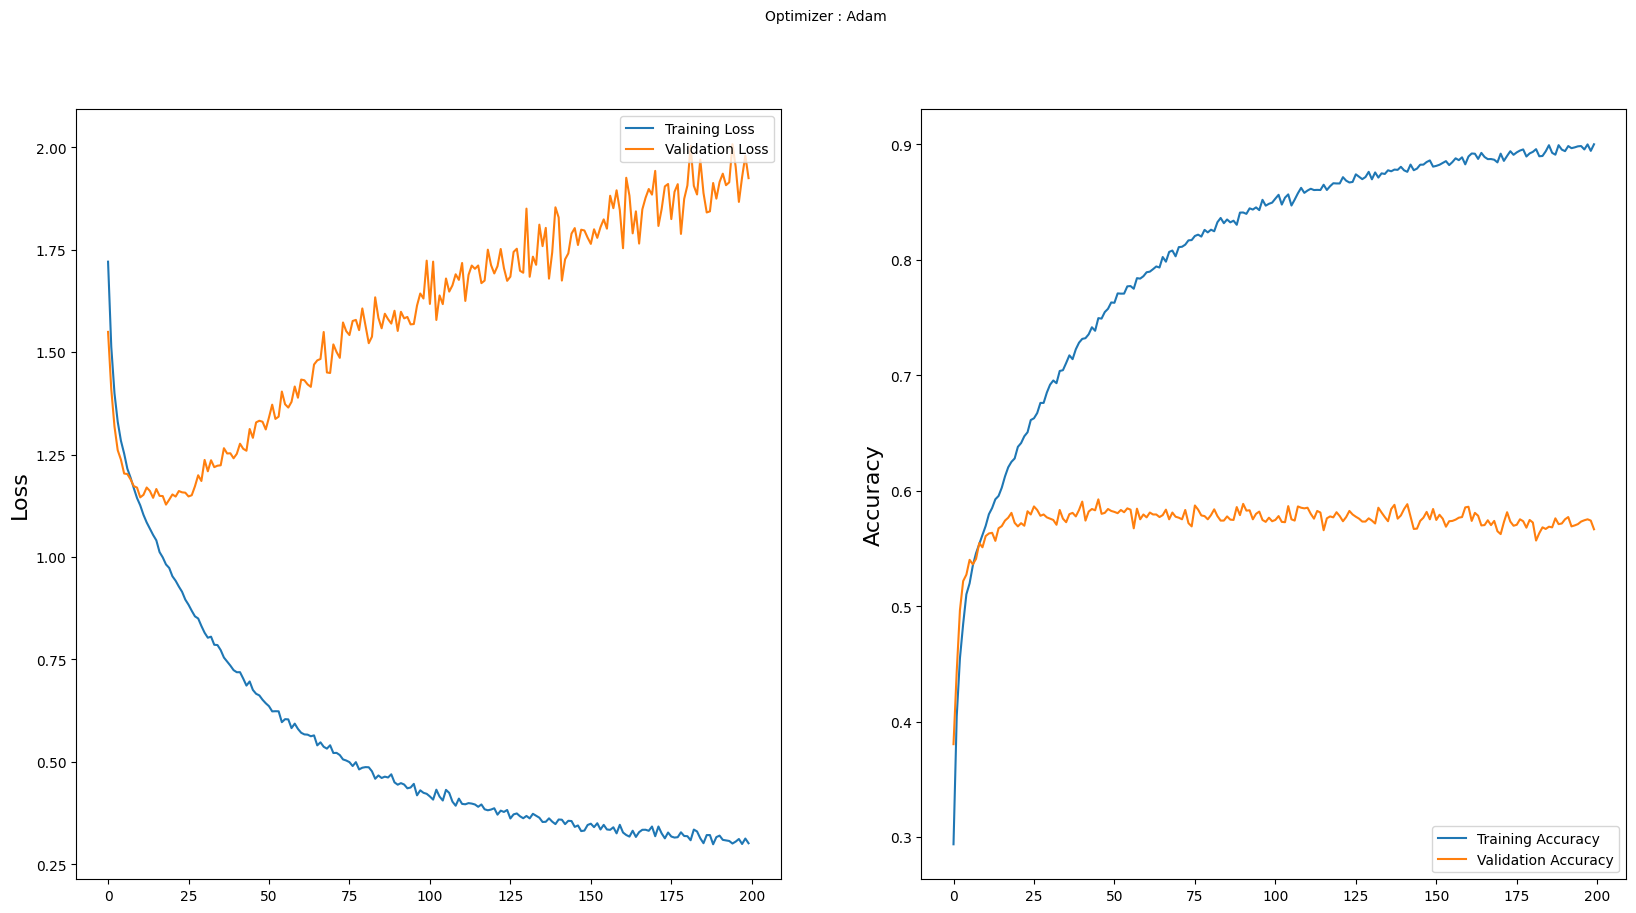

In [ ]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()